In [49]:
from helpers import *

k = 6
knum = 2

p = 50
n = 100
Z, M, B = create_factors(n, k, p, sig=.5, eps=.02, correlated=True)
# Z, _, _ = create_factors(n, k, p, sig=.5)
Z = normalize_columns(Z)

Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)

tsms_idx = tsms(Z, Zk, knum)
tsms_smin = smallest_singular_value(Z[:, tsms_idx])

_, Theta_hat = svd_convex_optimization(Z, .5*svd_C, knum)
sgl_idx = top_k_rows_indices(Theta_hat, knum)
sgl_smin = smallest_singular_value(Z[:, sgl_idx])

print(tsms_smin, sgl_smin)

0.021729526028733098 0.9493689002402791


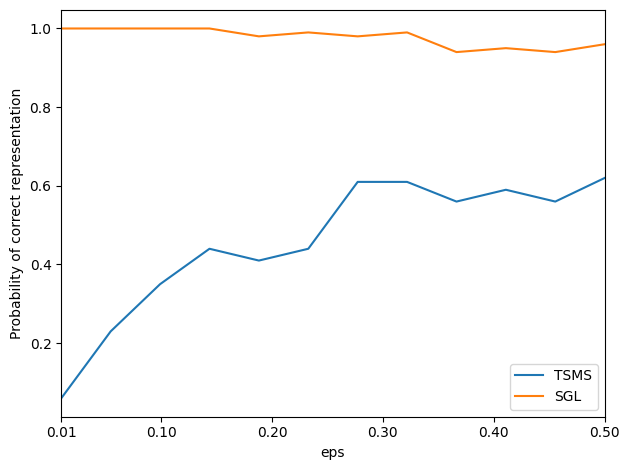

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *

# ... [previous imports and setup code]

# set seed for reproducibility
np.random.seed(1)

eps_values = np.linspace(0.01, 0.5, 12)
nreps = 1000
results = []

for eps in eps_values:
    for rep in range(nreps):
        Z, M, B = create_factors(n, k, p, sig=.5, eps=eps, correlated=True)
        Z = normalize_columns(Z)
        Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)

        tsms_idx = tsms(Z, Zk, knum)
        tsms_smin = smallest_singular_value(Z[:, tsms_idx]) 

        _, Theta_hat = svd_convex_optimization(Z, .5*svd_C, knum)
        sgl_idx = top_k_rows_indices(Theta_hat, knum) 
        sgl_smin = smallest_singular_value(Z[:, sgl_idx]) 

        results.append({'rep': rep, 'method': 'tsms', 'smin': tsms_smin, 'eps': eps})
        results.append({'rep': rep, 'method': 'sgl', 'smin': sgl_smin, 'eps': eps})

df = pd.DataFrame(results)

# averages = df.groupby(['method', 'eps']).smin.mean().reset_index()
averages = df.groupby(['method', 'eps']).apply(lambda g: (g['smin'] > 0.5).mean()).reset_index()
averages = averages.rename(columns={0: 'fraction_smin_gt_0_5'})


for method in ['tsms', 'sgl']:
    subset = averages[averages.method == method]
    plt.plot(subset.eps, subset.fraction_smin_gt_0_5, label=method.upper())
    # plt.plot(subset.eps, subset.smin, label=method.upper())

plt.xlabel('eps')
# plt.ylabel(r'$s_{min}(\hat X)$')
plt.ylabel(r'Probability of correct representation')
plt.xticks(list(plt.xticks()[0]) + [eps_values[0]])  # Adding the minimum eps value to the ticks
plt.xlim(eps_values[0], eps_values[-1])  # Setting x-axis limits
plt.legend()
plt.tight_layout()  # Adjusts plot parameters for better layout
plt.savefig("smin_vs_eps.png", dpi=300)  # Saves the plot as a PNG file with 300 dpi resolution
plt.show()

In [51]:
df

,rep,method,smin,eps
0,0,tsms,0.010471,0.01
1,0,sgl,0.998072,0.01
2,1,tsms,0.010188,0.01
3,1,sgl,0.923637,0.01
4,2,tsms,0.008377,0.01
...,...,...,...,...
2395,97,sgl,0.966950,0.50
2396,98,tsms,0.932399,0.50
2397,98,sgl,0.659840,0.50
2398,99,tsms,0.957186,0.50


In [52]:
averages

,method,eps,fraction_smin_gt_0_5
0,sgl,0.010000,1.00
1,sgl,0.054545,1.00
2,sgl,0.099091,0.99
3,sgl,0.143636,1.00
4,sgl,0.188182,1.00
5,sgl,0.232727,0.98
6,sgl,0.277273,1.00
7,sgl,0.321818,0.97
8,sgl,0.366364,0.96
9,sgl,0.410909,0.99
